In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
country_polygon = gpd.read_file('data/countries_clean.gpkg')
country_polygon

,ADMIN,geometry
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102..."
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101..."
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828...."
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."
...,...,...
155,Taiwan,"MULTIPOLYGON (((13570488.501 2869616.777, 1356..."
156,Japan,"MULTIPOLYGON (((14447401.267 3737037.331, 1444..."
157,Iceland,"MULTIPOLYGON (((-1621215.732 9982883.495, -162..."
158,Solomon Islands,"MULTIPOLYGON (((17867187.118 -1315679.987, 178..."


In [5]:
# get the projection
country_polygon.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

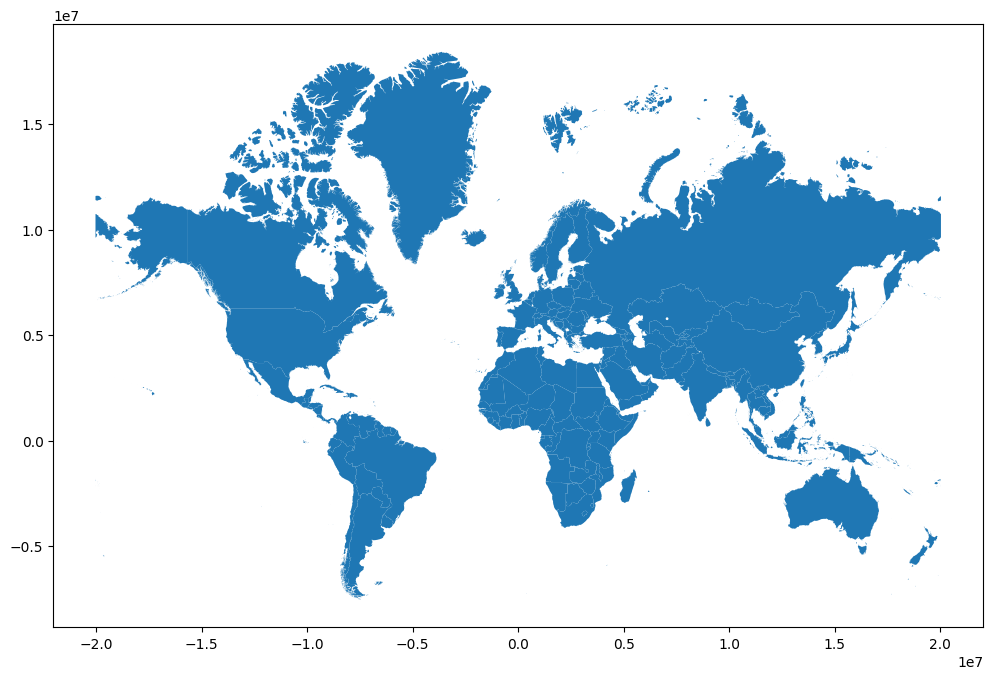

In [6]:
country_polygon.plot(figsize=(12, 10))

In [8]:
# get the centroid of each polgon
country_polygon['centroid'] = country_polygon.geometry.centroid
country_polygon

,ADMIN,geometry,centroid
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",POINT (13055431.810 -248921.141)
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",POINT (12211696.493 422897.505)
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-7959811.948 -4915458.802)
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828....",POINT (-7200010.945 -1894653.148)
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-8277554.831 -1032942.536)
...,...,...,...
155,Taiwan,"MULTIPOLYGON (((13570488.501 2869616.777, 1356...",POINT (13464229.170 2724159.010)
156,Japan,"MULTIPOLYGON (((14447401.267 3737037.331, 1444...",POINT (15380916.599 4560286.809)
157,Iceland,"MULTIPOLYGON (((-1621215.732 9982883.495, -162...",POINT (-2069885.342 9615335.051)
158,Solomon Islands,"MULTIPOLYGON (((17867187.118 -1315679.987, 178...",POINT (17771462.608 -996505.681)


<Axes: >

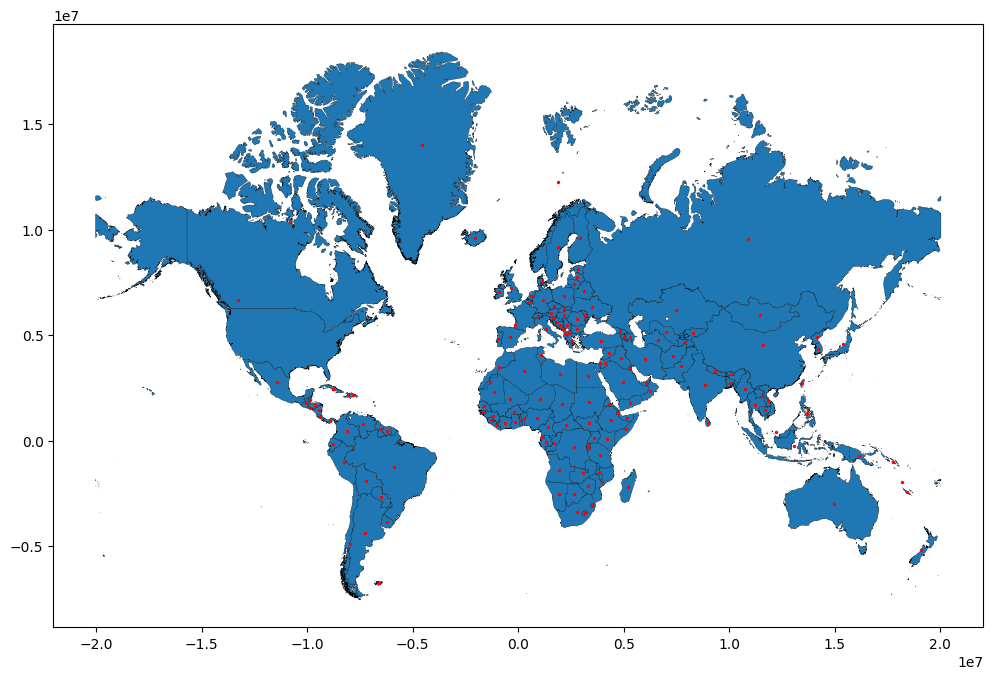

In [15]:
ax = country_polygon.plot(figsize=(12, 10), edgecolor="k", linewidth=0.2)
country_polygon.centroid.plot(ax=ax, color='red', markersize=2)

<Axes: >

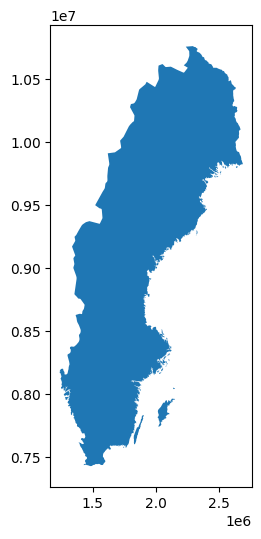

In [21]:
country_polygon.query("ADMIN == 'Sweden'").plot(figsize=(10, 6))

In [26]:
# red csv using pandas
tokyo_df = pd.read_csv('data/tokyo_clean.csv')
tokyo_df

# convert the lat lon cordinates to geomtry points using geopnads
tokyo_gdf = gpd.GeoDataFrame(tokyo_df, geometry=(gpd.points_from_xy(
    x=tokyo_df.longitude, y=tokyo_df.latitude, crs='EPSG:4326')))
tokyo_gdf

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y,geometry
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06,POINT (139.70050 35.67400)
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06,POINT (139.76652 35.70909)
2,62068690@N00,139.765632,35.694482,2008-12-21 15:45:31.0,http://www.flickr.com/photos/62068690@N00/3125...,1.555864e+07,4.258664e+06,POINT (139.76563 35.69448)
3,49503094041@N01,139.784391,35.548589,2011-11-11 05:48:54.0,http://www.flickr.com/photos/49503094041@N01/6...,1.556073e+07,4.238684e+06,POINT (139.78439 35.54859)
4,40443199@N00,139.768753,35.671521,2006-04-06 16:42:49.0,http://www.flickr.com/photos/40443199@N00/2482...,1.555899e+07,4.255517e+06,POINT (139.76875 35.67152)
...,...,...,...,...,...,...,...,...
9995,26981415@N00,139.582672,35.532785,2007-10-29 17:06:59.0,http://www.flickr.com/photos/26981415@N00/1797...,1.553827e+07,4.236522e+06,POINT (139.58267 35.53278)
9996,36516818@N00,139.749461,35.696870,2006-08-26 13:59:06.0,http://www.flickr.com/photos/36516818@N00/2623...,1.555684e+07,4.258991e+06,POINT (139.74946 35.69687)
9997,92996378@N00,139.770298,35.670336,2007-03-19 16:37:15.0,http://www.flickr.com/photos/92996378@N00/4321...,1.555916e+07,4.255354e+06,POINT (139.77030 35.67034)
9998,95795770@N00,139.739075,35.642470,2008-08-13 17:12:36.0,http://www.flickr.com/photos/95795770@N00/2759...,1.555568e+07,4.251537e+06,POINT (139.73908 35.64247)


<Axes: >

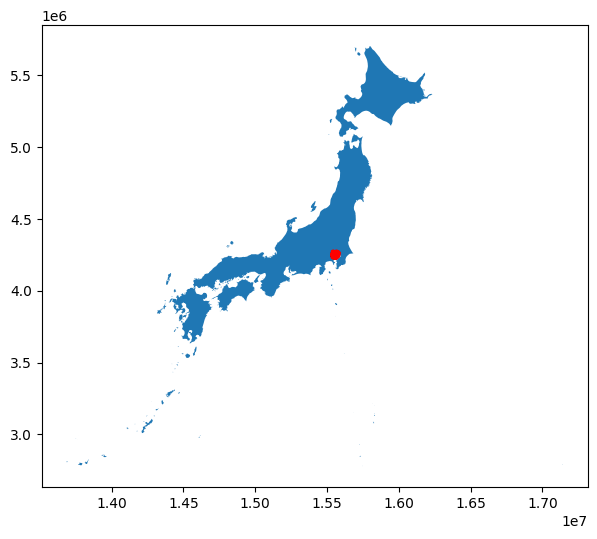

In [31]:
ax = country_polygon.query("ADMIN=='Japan'").plot(figsize=(10, 6))
tokyo_gdf.to_crs('EPSG:3857').plot(ax=ax, color='red', markersize=2)